In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras


In [271]:
dane = pd.read_csv("dataset.csv")
dane.head(10)

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,no,2.2,0,1,no,7,0.6,188,...,20,756,2549.0,9,7,19.0,0,0,wifi,medium cost
1,1,1021,yes,0.5,1,0,yes,53,0.7,136,...,905,1988,2631.0,17,3,7.0,1,1,no_wifi,high cost
2,2,563,yes,0.5,1,2,yes,41,0.9,145,...,1263,1716,2603.0,11,2,9.0,1,1,no_wifi,high cost
3,3,615,yes,2.5,0,0,no,10,0.8,131,...,1216,1786,2769.0,16,8,11.0,1,0,no_wifi,high cost
4,4,1821,yes,1.2,0,13,yes,44,0.6,141,...,1208,1212,1411.0,8,2,15.0,1,1,no_wifi,medium cost
5,5,1859,no,0.5,1,3,no,22,0.7,164,...,1004,1654,1067.0,17,1,10.0,1,0,no_wifi,medium cost
6,6,1821,no,1.7,0,4,yes,10,0.8,139,...,381,1018,3220.0,13,8,18.0,1,0,wifi,very high cost
7,7,1954,no,0.5,1,0,no,24,0.8,187,...,512,1149,700.0,16,3,5.0,1,1,wifi,low cost
8,8,1445,yes,0.5,0,0,no,53,0.7,174,...,386,836,1099.0,17,1,20.0,1,0,no_wifi,low cost
9,9,509,yes,0.6,1,2,yes,9,0.1,93,...,1137,1224,513.0,19,10,12.0,1,0,no_wifi,low cost


In [272]:
dane=dane.drop(columns="Unnamed: 0")

In [273]:
dane["wifi"] = dane["wifi"] .map({"wifi": 1, "no_wifi": 0})
dane["blue"] = dane["blue"] .map({"yes": 1, "no": 0})
dane["four_g"] = dane["four_g"] .map({"yes": 1, "no": 0})

dane.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1935 non-null   int64  
 1   blue           1915 non-null   float64
 2   clock_speed    1935 non-null   float64
 3   dual_sim       1935 non-null   int64  
 4   fc             1935 non-null   int64  
 5   four_g         1935 non-null   int64  
 6   int_memory     1935 non-null   int64  
 7   m_dep          1935 non-null   float64
 8   mobile_wt      1935 non-null   int64  
 9   n_cores        1935 non-null   int64  
 10  pc             1935 non-null   int64  
 11  px_height      1935 non-null   int64  
 12  px_width       1935 non-null   int64  
 13  ram            1913 non-null   float64
 14  sc_h           1935 non-null   int64  
 15  sc_w           1935 non-null   int64  
 16  talk_time      1873 non-null   float64
 17  three_g        1935 non-null   int64  
 18  touch_sc

tabele

In [274]:
X=dane[["battery_power","blue","clock_speed","dual_sim","fc","four_g","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi"]]
X["blue"] = X["blue"].fillna(X["blue"].mode()[0])
X = X.fillna(X.mean(numeric_only=True))
X = X.astype("float32")




C:\Users\Asus\AppData\Local\Temp\ipykernel_27816\1448916893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["blue"] = X["blue"].fillna(X["blue"].mode()[0])


In [275]:
Y=dane["price_range"]
label_map = {
    "low cost": 0,
    "medium cost": 1,
    "high cost": 2,
    "very high cost": 3
}
Y = dane["price_range"].map(label_map).astype("int32")
import sklearn.model_selection as sms
X_train, X_test, Y_train, Y_test=sms.train_test_split(X,Y,test_size=0.7,random_state=75)
X_test,X_wal,Y_test,Y_wal=sms.train_test_split(X_test,Y_test,test_size=0.5,random_state=75)
X_train = X_train.to_numpy()

In [276]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout




normalizer = Normalization()
normalizer.adapt(X_train)

model = keras.Sequential([
    normalizer,
    Dense(120, activation="relu"),
    Dropout(0.2),
    Dense(80, activation="relu"),
    Dropout(0.1),
    Dense(40, activation="relu"),
    Dense(20, activation="relu"),
    Dense(10, activation="relu"),
    Dense(4, activation="softmax")
])



In [277]:
ES=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [278]:

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy"
)

In [279]:
history = model.fit(X_train, Y_train,validation_data=(X_wal,Y_wal), epochs=100,callbacks=ES)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.3912 - val_loss: 1.3765
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3662 - val_loss: 1.3635
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3441 - val_loss: 1.3328
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2840 - val_loss: 1.2540
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1711 - val_loss: 1.1092
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0318 - val_loss: 0.9514
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8566 - val_loss: 0.7739
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6827 - val_loss: 0.5833
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5233 - val_loss: 0.4469
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3968 - val_loss: 0.3848
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3573 - val_loss: 0.3736
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - lo

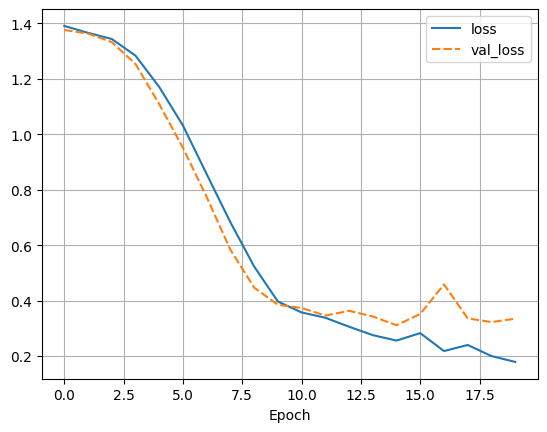

In [280]:
def display_history(history):
    sns.lineplot(history.history)
    plt.grid()
    plt.xlabel("Epoch")
display_history(history)

In [281]:
Y_predic= model.predict(X_wal)
Y_pred_classes = Y_predic.argmax(axis=1)


import sklearn
sklearn.metrics.mean_absolute_error(Y_wal,Y_pred_classes)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


0.13274336283185842

In [282]:
from sklearn.metrics import mean_absolute_error
Y_pr=model.predict(X_test)
Y_pred_classes = Y_pr.argmax(axis=1)
mean_absolute_error(Y_test, Y_pred_classes)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.1240768094534712

In [283]:
1-mean_absolute_error(Y_test, Y_pred_classes)

0.8759231905465288